In [31]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 
  
# data (as pandas dataframes) 
X = breast_cancer_coimbra.data.features 
y = breast_cancer_coimbra.data.targets 
  
# metadata 
print(breast_cancer_coimbra.metadata) 
  
# variable information 
print(breast_cancer_coimbra.variables) 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intr

In [32]:
# Don't run again
# y = y.replace({1:0, 2:1})
print(y)

     Classification
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
111               2
112               2
113               2
114               2
115               2

[116 rows x 1 columns]


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# process data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_test_split = X
X_train_test_split["set"] = 0
X_train_test_split.loc[X_test.index, 'set'] = 1
# Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

# polynomial degrees tested, lower seemed to increase the cross val slightly and increase the accuracy slightly 
model = SVC(kernel = 'poly', degree=1)

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring='accuracy')
print("Cross Val Mean: " + str(cv_results.mean()))
print("Cross Val Standard Deviation: " + str(cv_results.std()))

model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Cross Val Mean: 0.5515151515151515
Cross Val Standard Deviation: 0.03082877265056942
[[8 1]
 [1 2]]
Accuracy Score: 0.8333333333333334


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

# gamma as auto or scale works perfectly. This is the value where changing can show some variablility
model = SVC(kernel = 'rbf', gamma= "auto")
model.fit(X_train, y_train.values.ravel())

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring='accuracy')
print("Cross Val Mean: " + str(cv_results.mean()))
print("Cross Val Standard Deviation: " + str(cv_results.std()))

model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Cross Val Mean: 0.5515151515151515
Cross Val Standard Deviation: 0.03082877265056942
[[9 0]
 [0 3]]
Accuracy Score: 1.0


In [17]:
# this seems to improve the accuracy of the poly but doesn't seem to affect the cross val score
x_adjust = X.loc[:, ["BMI", "Resistin", "Glucose", "Age"]]
print(x_adjust)

           BMI  Resistin  Glucose  Age
0    23.500000   7.99585       70   48
1    20.690495   4.06405       92   83
2    23.124670   9.27715       91   82
3    21.367521  12.76600       77   68
4    21.111111  10.57635       92   86
..         ...       ...      ...  ...
111  26.850000  10.96000       92   45
112  26.840000   7.32000      100   62
113  32.050000  10.33000       97   65
114  25.590000   3.27000       82   72
115  27.180000   4.35000      138   86

[116 rows x 4 columns]


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# process data
X_train, X_test, y_train, y_test = train_test_split(x_adjust, y, test_size=0.1, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

# polynomial degrees tested, lower seemed to increase the cross val slightly and increase the accuracy slightly 
model = SVC(kernel = 'poly', degree=1, C=0.75)

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring='accuracy')
print("Cross Val Mean: " + str(cv_results.mean()))
print("Cross Val Standard Deviation: " + str(cv_results.std()))

model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Cross Val Mean: 0.5515151515151515
Cross Val Standard Deviation: 0.03082877265056942
[[3 1]
 [1 7]]
Accuracy Score: 0.8333333333333334


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# gamma as auto or scale works perfectly. This is the value where changing can show some variablility
model = SVC(kernel = 'rbf', gamma= "auto")
model.fit(X_train, y_train.values.ravel())

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring='accuracy')
print("Cross Val Mean: " + str(cv_results.mean()))
print("Cross Val Standard Deviation: " + str(cv_results.std()))

model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Cross Val Mean: 0.5515151515151515
Cross Val Standard Deviation: 0.03082877265056942
[[4 0]
 [0 8]]
Accuracy Score: 1.0


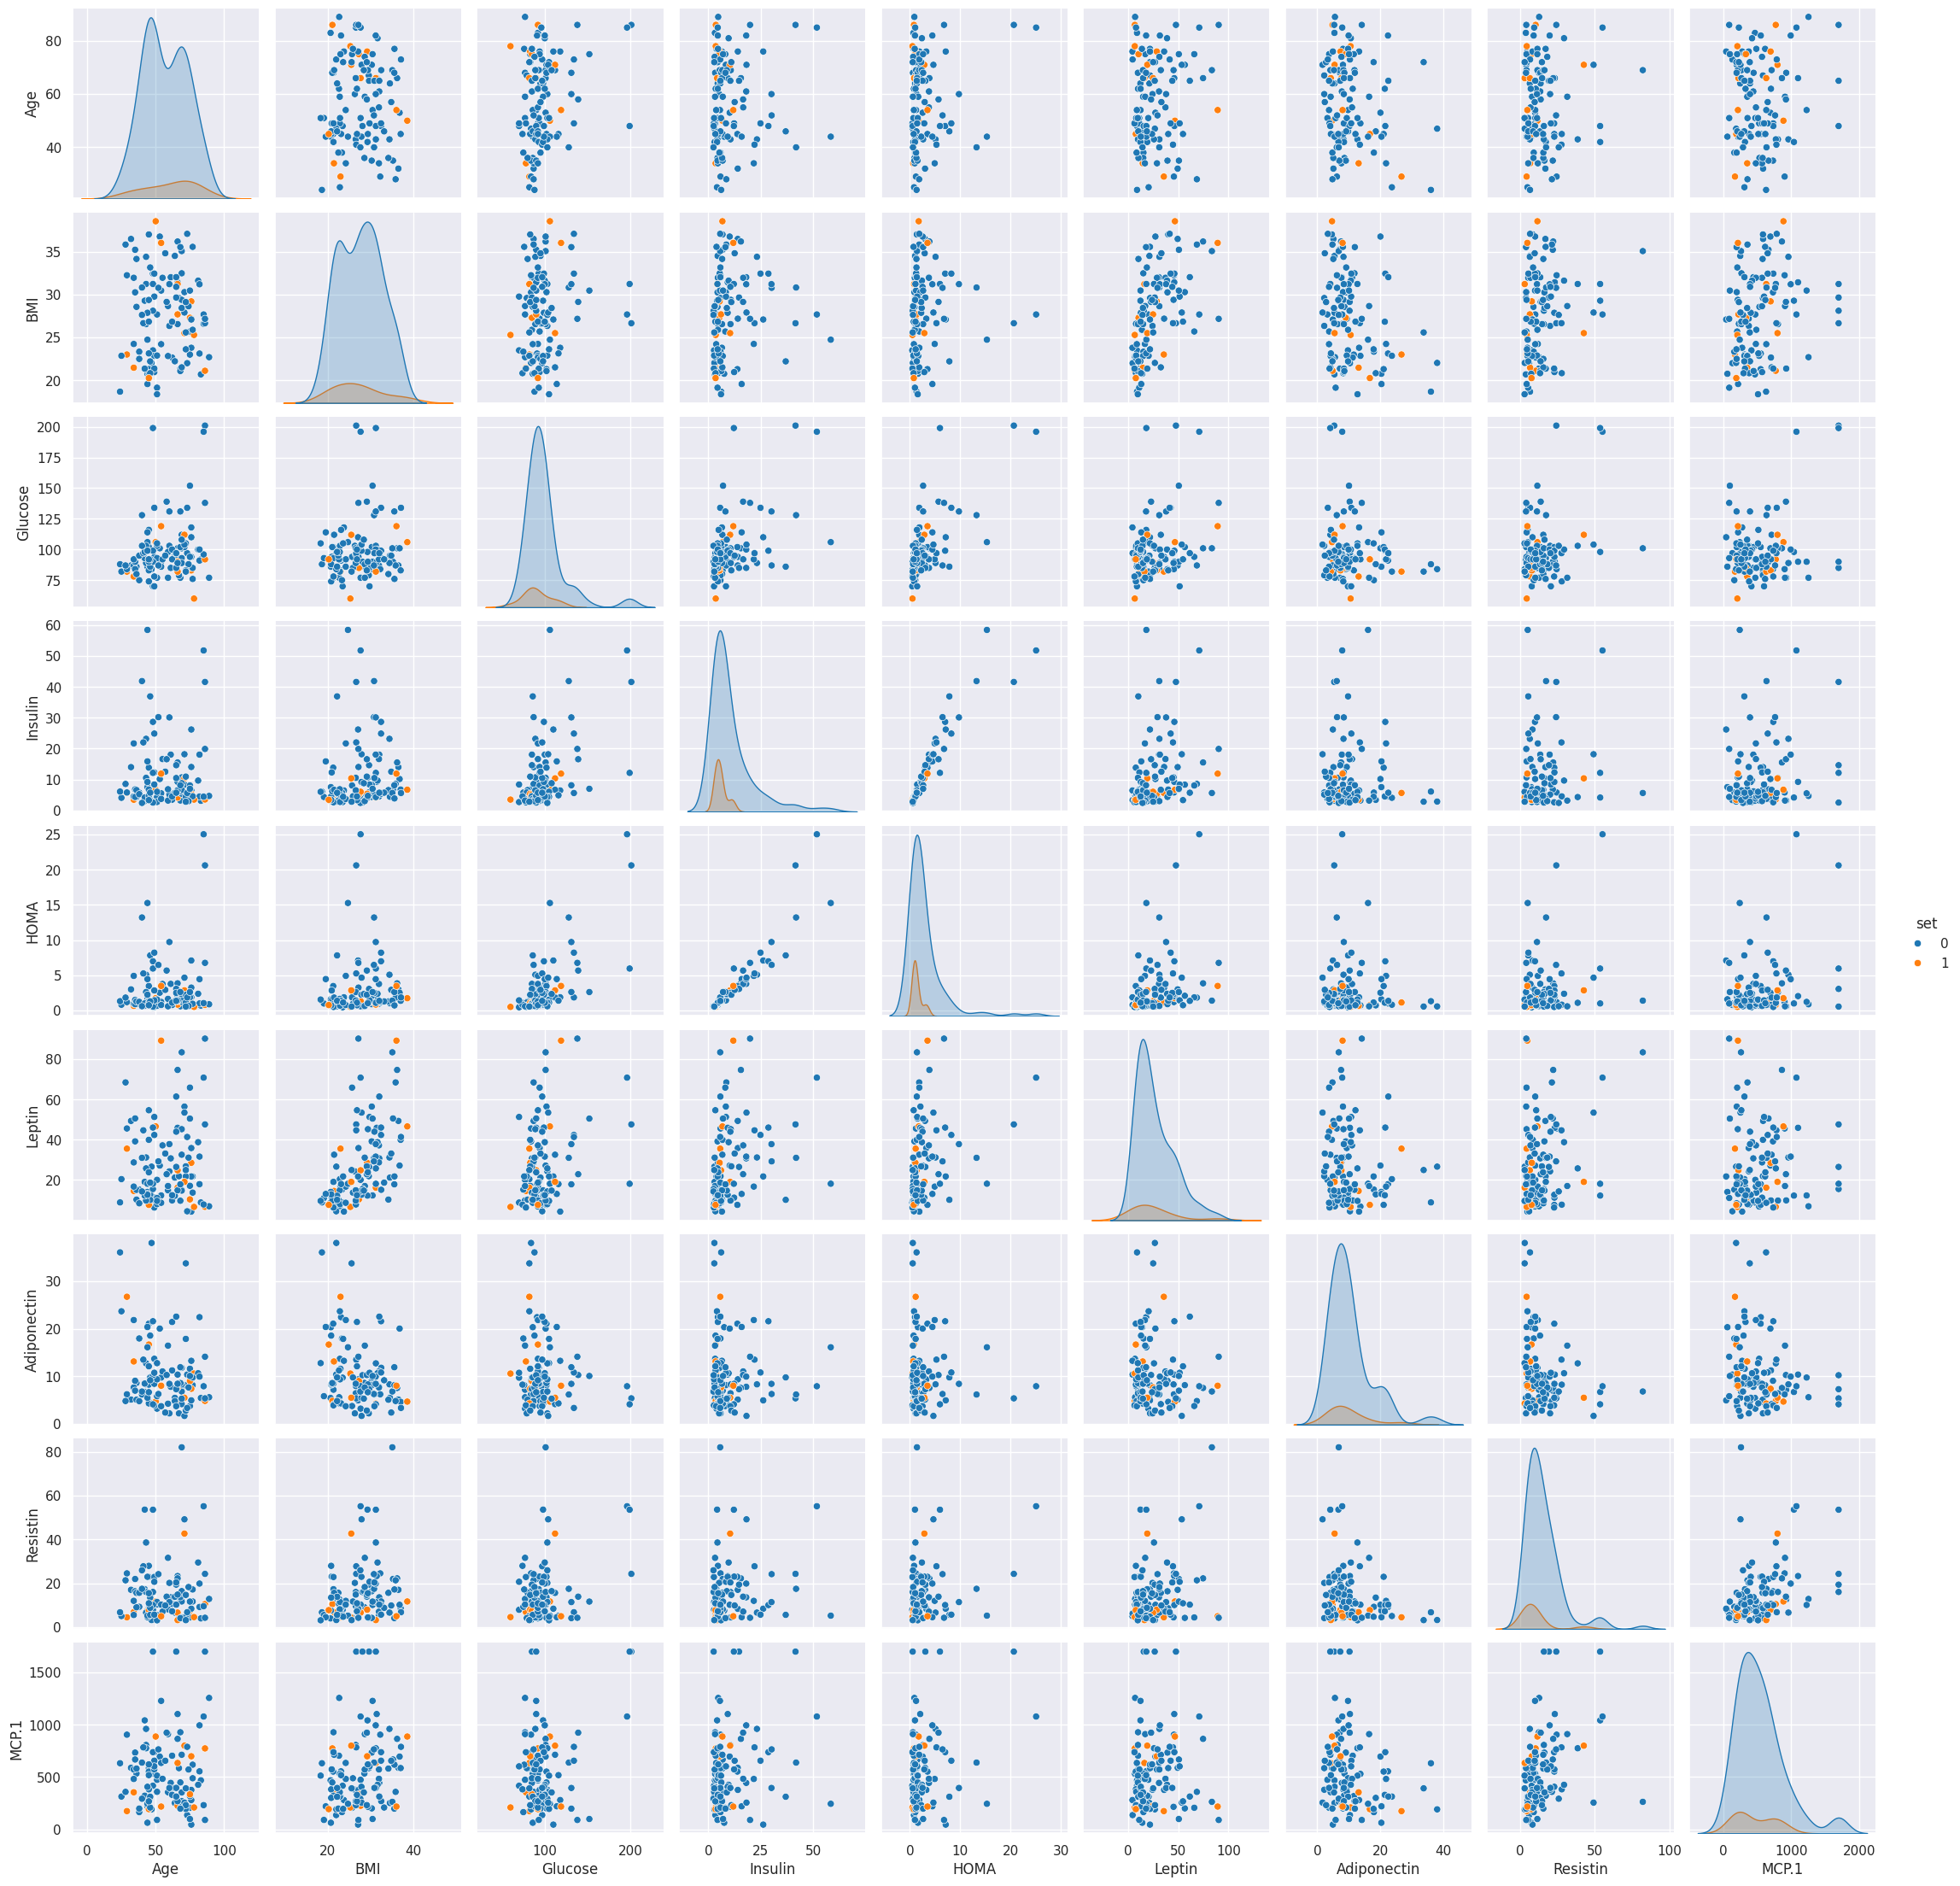

In [36]:
import seaborn as sns; sns.set()

sns.pairplot(data=X_train_test_split, hue = "set", palette = sns.color_palette("tab10", 2))